<a href="https://colab.research.google.com/github/fnoya/MP6_template/blob/master/Workshop_4_Intro_to_Pandas_in_Python%2C_Data_cleaning_and_Basic_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Everyone!


Workshop data and topics come from RealPython and Stat200 Material: https://realpython.com/python-data-cleaning-numpy-pandas/

I hope everyone's having a good week, this week, in replacement to our original powerpoint slides, we are going to use Jupyter Notebooks. Jupyter Notebooks are a super versitile tool that can be used to analyze and communicate data and insights. Jupyter notebook uses Python which is one of the most popular and versitile programming languages out there. For this lecture, we are going to focus on the basics of using Python for data science, as well as two tools that you'll use every day as a data scientist and quantitative Trader: Pandas and Numpy

## Importing into python

Python starts as a blank slate, and in order to use your tools, you have to import them. This is no different from a construction worker or carpenter. They start with an empty tool belt, and when they need to use a certain tool, they put it in their tool belt as they need it. Carrying around every single tool that exists is way too heavy would probably make your pants fall down. Precisely for this reason, the import system comes in extremely handy when make efficient notebooks!

Here's an example of what an import looks like

In [45]:
import pandas as pd #this line imports the pandas toolkit, and we chose to name it 'pd' for short
import numpy as np #this line imports the numpy toolkit, and we chose to name it 'np' for short

That wasn't so bad! Next, lets look into reading and cleaning data.

## And then there was data: Reading in a csv file and creating a dataframe

In the algorithm development process, once we create our hypothesis, we need to find data that we can use to either support or reject our hypothesis. This is done by reading in a file. Essentially this means that we take a file, and turn it into something that we can use in our Notebook. The most common types of files are Comma Separated Value (.csv) files. They tend to have the same icon as the Microsoft Excel files, but if you click on them, you'll be able to see where they get their names from, as they are literally a file of comma separated values. You can read these files using the .readcsv() function like so

In [ ]:
pd.read_csv('BL-Flickr-Images-Book.csv')

FileNotFoundError: ignored

We just read the data file! It looks really pretty compared to the raw csv file, but how are we supposed to use it? Oops, how are we supposed to save it. This is where variables come in. Just like any other data structure, you can save the file into a variable. This variable is called a DataFrame, and is most commonly called 'df'. However, you can call it whatever you like. In addition to saving it this time, we can also use the '.head()' function to display the data as well

In [ ]:
df = pd.read_csv('BL-Flickr-Images-Book.csv')
#We're going to be using this second dataframe for future parts of the workshop
height_df = pd.read_csv('heights.txt', sep=' ') #By specifying how the data is separated, it allows us to read this .txt file
df.head() #Shows the first 5 rows of data.  


#You can put any number you want in the parenthesis and this will change the number of rows displayed

## Reading and understanding our data
Being able to understand what our data is is the most important part of being able to work with it. We already used the .head function, but lets look at it again with our height dataset.

In [ ]:
height_df.head()

We can also display aspects of our data in different ways as well. For example, if we wanted to find the names of our columns, we can find those in our dataframe like so:

In [ ]:
print(height_df.columns.values)

When we start getting into more complicated topics such as machine learning, understanding how big your data becomes extremely important as well. We can use this information by using '.shape'. This return a tuple with the first value representing the number of rows, and the second number representing the number of columns.

In [ ]:
height_df.shape

If we wanted to find out more about an individual row, we can do so by using the brackets like this. Notice how there's only one number because there is only 1 column

In [ ]:
height_df['Mheight'].shape

Perhaps we wanted to find out how many items show up in each row. We can do so using value_counts

In [ ]:
height_df['Mheight'].value_counts()

Lets say that we wanted to find what kind of values are in the data without seeing all of them repeat. We can do so using the unique() function

In [ ]:
height_df['Dheight'].unique()

Finally, lets look at the 5 number summary for the Mheight data

In [ ]:
heightSum = height_df['Mheight'].quantile([0.0, 0.25,0.5,0.75, 1.0])
heightSum

We can also pull a bunch of other usefull information out of the data as well

In [ ]:
print(height_df['Mheight'].mean())
print(height_df['Mheight'].std())
print(height_df['Mheight'].sem())

## Data Cleaning: Data Manipuation and Data Cleaning

One thing you'll notice once we have our data is that there is a lot of 'NaN' (Not a Number) values in our data. This means that data doesn't exist for these collumns. You'll also notice that there are a lot of pretty useless rows that while may be useful for other purposes, we may not need for this workshop. We can remove or 'drop' this data in several ways

We can explicitly drop the desired columns:

In [ ]:
df = pd.read_csv('BL-Flickr-Images-Book.csv') # This line basically resets our dataframe so that we can see the drop happen
to_drop = ['Edition Statement',
            'Corporate Author',
            'Corporate Contributors',
            'Former owner',
            'Engraver',
            'Contributors',
           'Issuance type',
            'Shelfmarks'] # This creates a list of the columns that we want to drop

df.drop(columns=to_drop, inplace=True)
#This drops our columns, dropping the columns in 'df' that have the names in our 'to_drop list'
#inplace = True signifies that we want to change the original variable 'df' instead of creating a new variable

We can also drop the 'NaN' values to make the data cleaner to work with:

In [ ]:
df = pd.read_csv('BL-Flickr-Images-Book.csv') # This line basically resets our dataframe so that we can see the drop happen
df.dropna()

.dropna() drops every single row with an 'NaN' value, which in this case happens to be all of them. Oops, lets reset that.

In [ ]:
df = pd.read_csv('BL-Flickr-Images-Book.csv') # This line basically resets our dataframe so that we can see the drop happen
df

## I can show you the world: Data Visualization in Python

Data visualization is one of the most important aspects of doing data science and quantitative finance. In order to do data visualization, we first have to add the right tools to our toolbelt. There are many tools that can be used to visualize data, some better than others. For this workshop we are going to be using matplotlib.pyplot, and calling it plt for short. We're also going to be using a different data set, the 'heights.txt' dataset for this part.

In [ ]:
import matplotlib.pyplot as plt
height_df

,Mheight,Dheight
0,59.7,55.1
1,58.2,56.5
2,60.6,56.0
3,60.7,56.8
4,61.8,56.0
...,...,...
1370,69.1,70.1
1371,65.0,71.6
1372,66.3,71.4
1373,70.8,71.0


We can visualize this data in several different ways. Two of the most common are histograms, boxplots, and scatterplots and can be done as shown:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A927663D0>,
      dtype=object)

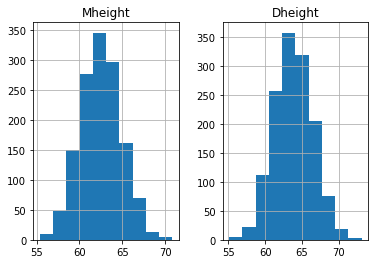

In [ ]:
#Boxplots represent the number of occurrences in the data, for example, there were a little under 350 Mothers with a height of 63
height_df.hist()
#plt.show()

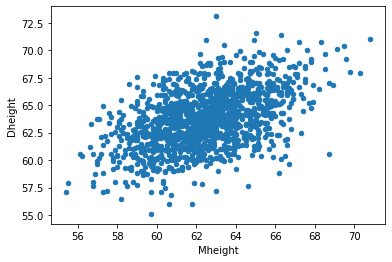

In [ ]:
#Scatterplots can help visualize the points in the sample, the X axis is Mother hight and the Y axis is the daughter height
height_df.plot.scatter(x='Mheight', y='Dheight')

{'whiskers': [<matplotlib.lines.Line2D at 0x22a929547f0>,
 'caps': [<matplotlib.lines.Line2D at 0x22a92954eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a92954490>],
 'medians': [<matplotlib.lines.Line2D at 0x22a929665b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a929668b0>],
 'means': []}

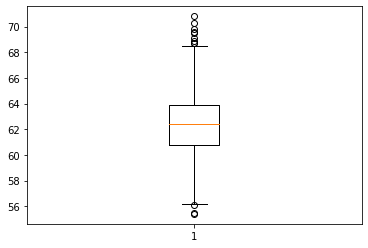

In [ ]:
plt.boxplot(height_df['Mheight'])

Compare this with the 5 number summary, and see the way that it matches up perfectly

In [ ]:
heightSum

0.00    55.4
0.25    60.8
0.50    62.4
0.75    63.9
1.00    70.8
Name: Mheight, dtype: float64

## Hypothesis Testing in Python

Hypothesis testing is arguably the most important and foundational part of statistics. This next section is going to be a bunch of math, but while you take the time to learn it, Python will end up doing most of the heavy lifting for you! There are many more tests than just these, but these are the most basic to know. Most of the basic hypotheses tests will be done using scipy.stats.

In [ ]:
import scipy.stats as st

### Creating a hypothesis
The first step in testing a hypothesis is to create one. In statistics, we have two hypotheses, the null hypothesis and the alternative hypothesis, namely

$
H_0 : Null \ Hypothesis:  \ What \ is \ generally \ accepted \\
H_1 : Alternative \ Hypothesis: \ What \ we \ are \ trying \ to \ prove \\
$

Generally, the null hypothesis holds unless the can successfully reject the null hypothesis. In the case that we do not reject the null hypothesis it is important that we do not accept the null hypothesis. This distinction is important because us not proving that our alternative hypothesis holds at a given signficance level does not prove the strength of the alternative

### What does a hypothesis test do
Essentially, hypothesis testing is a tool in inferential statistics for determining what the value of a population parameter based on a sample. Statisticians take a very pessimistic view, and require a certain statistical significance of deviation from the norm within the sample in order to reject the null hypothesis. This statistical significance is called alpha, $\alpha$. This $\alpha$ differs from quantitative finance alpha, as statistical alpha represents the significance level of a hypothesis test, while the quantitative finance alpha measures excess portfolio returns. It's unfortunate that they use the same variable since they are both so important to quantitative traders, but it is what it is.


The hypotheses tests return two things. The first is the z/t score, which signifies a 

### One Sample Hypothesis Tests
The most basic of hypotheses tests are the one sample z test and the one sample t test. This is generally used when we want to compare the outcome of a sample to a given population. For example if we wanted to compare the mean height of women to a sample of women's heights. Generally the difference between one sample z tests and t tests is that z-tests deal with sample sizes greater than 30 and t-tests are more applicable to samples of size less than 30.

The one sample z test is given by the equation:

$$
 z = {{\bar{x} - \mu} \over \sigma / \sqrt n}
$$
where
$
\bar{x} : the \ mean \ of \ the \ sample \\
\mu : the \ mean \ of \ the \ population \\
\sigma : The \ standard \ deviation \ of \ the \ population\\
n : the \ sample \ size \\
$
The one sample t test is given by the equation:
$$
 t = {{\bar{x} - \mu} \over s / \sqrt n}
$$
$
\bar{x} : the \ mean \ of \ the \ sample \\
\mu : the \ mean \ of \ the \ population \\
\sigma : The \ standard \ deviation \ of \ the \ sample\\
n : the \ sample \ size
$


When doing this in python, it becomes a lot easier. Lets say that we wanted to do a one sample proportion z-test, we would do it like so:

In [ ]:
import statsmodels.api as sm

n = 1018
mu = .52
xbar = .56

t, p = sm.stats.proportions_ztest(xbar * n, n, mu, alternative='larger')
print("The t statistic is:" , t)
print("The p value is: ", p)
#>> (2.571067795759113, 0.005069273865860533)

The t statistic is: 2.571067795759113
The p value is:  0.005069273865860533


If we wanted to do a one sample t-test, we would do it like so

In [ ]:
sample = height_df['Mheight']
popmean = 60 #Some number that represents the null hypothesis' population mean

st.ttest_1samp(sample, popmean = popmean)

Ttest_1sampResult(statistic=38.61922284646361, pvalue=1.5148291124750557e-221)

### Two Sample Hypotheses Tests
In addition to 1 sample tests, there are also 2 sample tests. These tests are usually called 'difference in means' tests, and measure how similar two samples are. For these tests, the null and alternative hypotheses are as follows:

$
H_0: \mu_1 = \mu_2 \\
\\
H_1: \mu_1 \neq \mu_2 \\ \\
$
And here are the equations for each difference in means test

![image-2.png](attachment:image-2.png)
While these equations may look intimidating, python makes hypothesis testing extremely easy as well!

Two sample Z test

In [ ]:
import statsmodels.stats as sm
sm.weightstats.ztest(height_df['Mheight'],  height_df['Dheight'])

(-13.722678632777303, 7.426998142838605e-43)

Two sample t test

In [ ]:
st.ttest_ind(height_df['Mheight'], height_df['Dheight'])

Ttest_indResult(statistic=-13.722678632777303, pvalue=1.6801967841194503e-41)

# Confidence Intervals

Confidence intervals are serve the important role of allowing us to approximate with our data. It allows us to say "I'm the true value of something that I'm measuring most likely falls between a and b." It also allows us to qualify it numerically, and say "I'm 95% confident that the true value of a parameter falls between a and b." Confidence intervals and its formula differs based on the data and the type of situation it's being used in. 

### One sample Confidence Intervals
The main goal for one sample Confidence intervals is to be able to say "I am some % certain that the mean is within this interval" One sample confidnece intervals are mathematically calculated using these equations: 
![image.png](attachment:image.png)

For example, we can say that we are 95% certain that the mean value of Mother height is between [62.328, 62.577]

In [ ]:
confidence = .95
degrees_of_freedom = height_df['Mheight'].shape[0] - 1
mean = np.mean(height_df['Mheight'])
standard_error = st.sem(height_df['Mheight'])
print("Our confidence interval is: ", st.t.interval(confidence, degrees_of_freedom, loc = mean, scale = standard_error))

Our confidence interval is:  (62.328208207548755, 62.57739179245125)


### Two Sample Confidence Intervals

Similar to the two sample hypothesis tests, there are three kinds of two-sample confidence intervals, the first is the two sample z test, and the second two are the two sample t-test with known population mean, and the two sample t-test with an unknown population mean. In this order, these are their respective equations:
![image.png](attachment:image.png)

The most commonly used two sample confidence interval is with unknown population, and can be easily found in Python like this:


In [31]:
mean = height_df['Mheight'].mean() - height_df['Dheight'].mean()
n1 = len(height_df['Mheight'])
n2 = len(height_df['Dheight'])
sem = (np.sqrt((n1-1)*height_df['Mheight'].sem()**2 + (n2-1)*height_df['Dheight'].sem()**2)/(n1+n2-2))*(np.sqrt(1/n1 + 1/n2))
lcb = mean - 1.96*sem  #lower limit of the CI
ucb = mean + 1.96*sem  #upper limit of the CI
(lcb, ucb)

(-1.2983499386323698, -1.29815915227654)

# Do it yourself


Now that we've seen all of the cool things that we can do, why don't we try it ourselves! Lets say that we are given data 'leadstudy' that measures the iq of people in the US who have been exposed to lead, and we want to see if the average IQ of these people are greater than 100.

**First, read in 'leadstudy.csv' into a dataframe and display the first 7 rows**

In [32]:
df = pd.read_csv("leadstudy.csv")

**Next, create a histogram of the 'fulliq' column to see the distribution of the data**

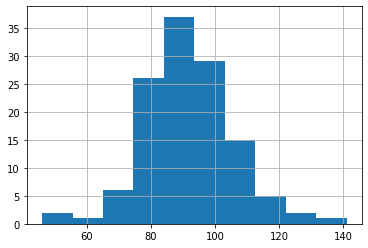

In [53]:
df["fulliq"].hist()

**Now, find the sample size, mean, standard deviation and standard error for 'fulliq'**

In [54]:
df["fulliq"].shape
df["fulliq"].mean()


91.08064516129032

**Then, create a 95% confidence interval for the mean value of 'fulliq' for this population**

In [52]:
confidence = .95
degrees_of_freedom = df['fulliq'].shape[0] - 1
mean = np.mean(df['fulliq'])
standard_error = st.sem(df['fulliq'])
print("Our confidence interval is: ", st.t.interval(confidence, degrees_of_freedom, loc = mean, scale = standard_error))

Our confidence interval is:  (88.52021975317433, 93.64107056940631)


**Finally, based on these results, determine whether or not the population mean is significantly different from the sample at an $\alpha$ of 0.05**

In [ ]:
hypothesis is 100, then is different from sample

Great! you're getting the hang of it. Now lets try to compare the two groups with different levels of lead exposure (lead < 40, and lead >= 40). Let's say that we wanted to see if there was a statistically significant difference between IQ's of the two. How would we go about doing that? Remember that you're free to look at the equations we used previously. 

**First print the null and alternative hypotheses.**

In [55]:
print ("H0, less40 = more40")
print ("H1, less4- not = more40")

H0, less40 = more40
H1, less4- not = more40


**Next, perform the appropriate t-test to find t he t-test statistic and the p-value**

In [72]:
st.ttest_ind(df[df['group'] == "lead < 40"]["fulliq"], df[df['group'] == "lead >= 40"]["fulliq"])

Ttest_indResult(statistic=1.833398840474052, pvalue=0.06918094358567622)

**Given the t-test statistic and p-value that you just found, what conclusions can we make between the two groups at a significance level of** $\alpha = 0.10 $

In [73]:
print("There is a significant difference between the two groups.  We reject the null H.")

There is a significant difference between the two groups.  We reject the null H.


# Getting Familar with Python

For people that are new to using Python in a Notebook setting, this is probably a lot to take in. The good news is that even the most experienced Python data scientists spend a lot of time looking up documentation for functions. It's just a part of using Python, and is something that you'll get better at as time goes on. If you want to learn more about Python for Data Science, towardsdatascience.com is a great resource that you can leverage to learn more independently.